In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

Using TensorFlow backend.


In [2]:
cnn = Sequential()

cnn.add(Conv2D(16,(3,3), input_shape=(128,128,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dense(32,activation='relu'))
cnn.add(Dense(4,activation='softmax'))

cnn.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['accuracy'])


cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255,shear_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255)

In [5]:
train_set = train_datagen.flow_from_directory('Weather Classification/train',target_size=(128,128),batch_size=30,class_mode='categorical')
test_set = test_datagen.flow_from_directory('Weather Classification/test',target_size=(128,128),batch_size=17,class_mode='categorical')

Found 870 images belonging to 4 classes.
Found 255 images belonging to 4 classes.


In [6]:
history = cnn.fit_generator(train_set,steps_per_epoch=29,validation_steps=15,validation_data=test_set,epochs=25)

Epoch 1/25
29/29 [==============================] - 17s 586ms/step - loss: 0.9153 - accuracy: 0.5920 - val_loss: 0.5618 - val_accuracy: 0.6745
Epoch 2/25
29/29 [==============================] - 12s 407ms/step - loss: 0.6156 - accuracy: 0.7448 - val_loss: 0.3161 - val_accuracy: 0.7137
Epoch 3/25
29/29 [==============================] - 13s 446ms/step - loss: 0.5206 - accuracy: 0.7874 - val_loss: 0.6014 - val_accuracy: 0.7765
Epoch 4/25
29/29 [==============================] - 12s 423ms/step - loss: 0.4258 - accuracy: 0.8414 - val_loss: 0.2775 - val_accuracy: 0.9098
Epoch 5/25
29/29 [==============================] - 12s 403ms/step - loss: 0.4016 - accuracy: 0.8391 - val_loss: 0.1686 - val_accuracy: 0.9451
Epoch 6/25
29/29 [==============================] - 11s 385ms/step - loss: 0.3892 - accuracy: 0.8437 - val_loss: 0.6071 - val_accuracy: 0.8392
Epoch 7/25
29/29 [==============================] - 12s 402ms/step - loss: 0.3192 - accuracy: 0.8713 - val_loss: 0.1393 - val_accuracy: 0.9020

In [7]:
import matplotlib.pyplot as plt

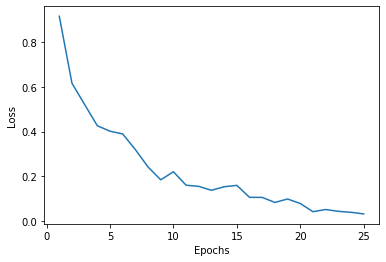

In [8]:
epoch_count = range(1,len(history.history['loss'])+1)

plt.plot(epoch_count,history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

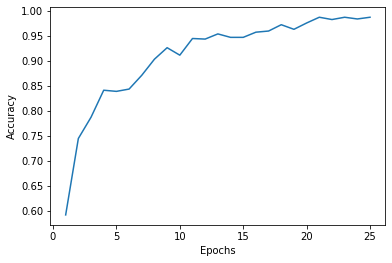

In [9]:
plt.plot(epoch_count,history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

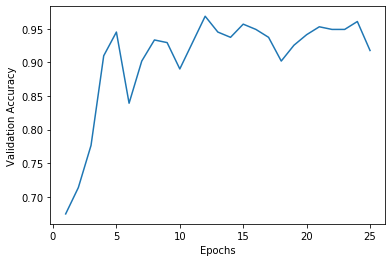

In [10]:
plt.plot(epoch_count,history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

In [11]:
import cv2

In [32]:
test_set.class_indices

{'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3}

array([3], dtype=int64)

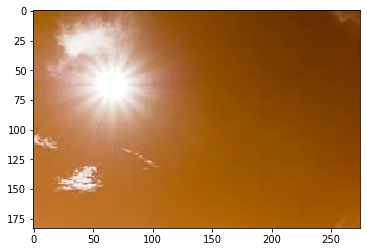

In [30]:
img  = cv2.imread('predictions/shine.jpg')
plt.imshow(img)
img  = cv2.resize(img,(128,128))
img  = img.reshape(1,128,128,3)

y_pred = cnn.predict_classes(img)
y_pred

array([1], dtype=int64)

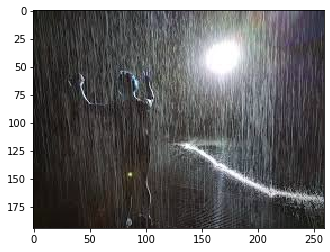

In [28]:
img  = cv2.imread('predictions/rain.jpg')
plt.imshow(img)
img  = cv2.resize(img,(128,128))
img  = img.reshape(1,128,128,3)

y_pred2 = cnn.predict_classes(img)
y_pred2

array([2], dtype=int64)

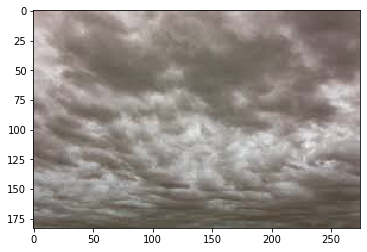

In [29]:
img  = cv2.imread('predictions/cloud.jpg')
plt.imshow(img)
img  = cv2.resize(img,(128,128))
img  = img.reshape(1,128,128,3)

y_pred3 = cnn.predict_classes(img)
y_pred3

array([2], dtype=int64)

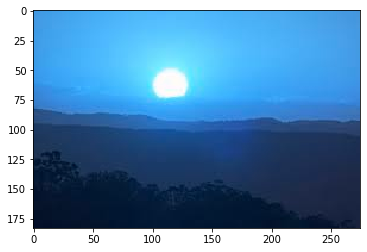

In [31]:
img  = cv2.imread('predictions/sunrise.jpg')
plt.imshow(img)
img  = cv2.resize(img,(128,128))
img  = img.reshape(1,128,128,3)

y_pred4 = cnn.predict_classes(img)
y_pred4